## Traing the model to evaluate the labled images

In [1]:
import cv2
import json
from matplotlib import pyplot as plt
import numpy as np
import os
import random

# import a lot of things from keras:
# sequential model
from keras.models import Sequential

# layers
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, RandomFlip, RandomRotation, RandomContrast, RandomBrightness

# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# convert data to categorial vector representation
from keras.utils import to_categorical

# nice progress bar for loading data
from tqdm.notebook import tqdm

# helper function for train/test split
from sklearn.model_selection import train_test_split

# import confusion matrix helper function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# import pre-trained model
from keras.applications.vgg16 import VGG16

# include only those gestures
CONDITIONS = ['like', 'stop','dislike','peace','rock']

# image size
IMG_SIZE = 64
SIZE = (IMG_SIZE, IMG_SIZE)

# number of color channels we want to use
# set to 1 to convert to grayscale
# set to 3 to use color images
COLOR_CHANNELS = 3

annotations = dict()

for condition in CONDITIONS:
    with open(f'_annotations/{condition}.json') as f:
        annotations[condition] = json.load(f)
        
def preprocess_image(img):
    if COLOR_CHANNELS == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img, SIZE)
    return img_resized

images = [] # stores actual image data
labels = [] # stores labels (as integer - because this is what our network needs)
label_names = [] # maps label ints to their actual categories so we can understand predictions later

# loop over all conditions
# loop over all files in the condition's directory
# read the image and corresponding annotation
# crop image to the region of interest
# preprocess image
# store preprocessed image and label in corresponding lists
for condition in CONDITIONS:
    for filename in tqdm(os.listdir(condition)):
        # extract unique ID from file name
        UID = filename.split('.')[0]
        img = cv2.imread(f'{condition}/{filename}')
        
        # get annotation from the dict we loaded earlier
        try:
            annotation = annotations[condition][UID]
        except Exception as e:
            print(e)
            continue
        
        # iterate over all hands annotated in the image
        for i, bbox in enumerate(annotation['bboxes']):
            # annotated bounding boxes are in the range from 0 to 1
            # therefore we have to scale them to the image size
            x1 = int(bbox[0] * img.shape[1])
            y1 = int(bbox[1] * img.shape[0])
            w = int(bbox[2] * img.shape[1])
            h = int(bbox[3] * img.shape[0])
            x2 = x1 + w
            y2 = y1 + h
            
            # crop image to the bounding box and apply pre-processing
            crop = img[y1:y2, x1:x2]
            preprocessed = preprocess_image(crop)
            
            # get the annotated hand's label
            # if we have not seen this label yet, add it to the list of labels
            label = annotation['labels'][i]
            if label not in label_names:
                label_names.append(label)
            
            label_index = label_names.index(label)
            
            images.append(preprocessed)
            labels.append(label_index)
            
            
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


X_train = np.array(X_train).astype('float32')
X_train = X_train / 255.

X_test = np.array(X_test).astype('float32')
X_test = X_test / 255.

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

train_label = y_train_one_hot
test_label = y_test_one_hot

X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, COLOR_CHANNELS)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, COLOR_CHANNELS)

print(X_train.shape, X_test.shape, train_label.shape, test_label.shape)

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

  0%|          | 0/250 [00:00<?, ?it/s]

1301
326
1301
326
(1301, 64, 64, 3) (326, 64, 64, 3) (1301, 6) (326, 6)


Epoch 1/50


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.2371 - loss: 1.7909 - val_accuracy: 0.2393 - val_loss: 1.7908 - learning_rate: 0.0010
Epoch 2/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.2439 - loss: 1.7585 - val_accuracy: 0.4141 - val_loss: 1.4977 - learning_rate: 0.0010
Epoch 3/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.4173 - loss: 1.4380 - val_accuracy: 0.5644 - val_loss: 1.0744 - learning_rate: 0.0010
Epoch 4/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.5783 - loss: 1.0761 - val_accuracy: 0.7362 - val_loss: 0.7010 - learning_rate: 0.0010
Epoch 5/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7054 - loss: 0.8022 - val_accuracy: 0.8006 - val_loss: 0.5694 - learning_rate: 0.0010
Epoch 6/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7889 - loss: 0.6050 - val_accuracy: 0.8037 - val_loss: 0.5625 - learning_rate: 0.0010
Epoch 7/50
163/163 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8579 - loss: 0.4154 - val_

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 64, 64, 3)      │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │        15,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │        51,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297,428 (1.13 MB)

 Trainable params: 99,142 (387.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 198,286 (774.56 KB)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
before [[1.69195159e-15 1.66331105e-07 7.11202375e-10 9.99999881e-01
  1.41403191e-11 5.23180844e-14]
 [1.31973129e-05 6.49009962e-07 1.05159501e-12 1.22201869e-12
  9.32083070e-01 6.79029822e-02]
 [3.38442464e-06 1.68251304e-03 2.45164557e-07 1.25802870e-07
  3.73292365e-04 9.97940481e-01]
 ...
 [1.81495563e-09 3.87425622e-04 1.44471380e-06 9.99610960e-01
  1.71823444e-07 2.49950229e-08]
 [1.19847338e-15 9.10360882e-07 1.38628575e-09 9.99999046e-01
  6.11190243e-13 2.82543129e-15]
 [2.52728199e-12 9.99999762e-01 7.35092609e-09 9.74038699e-08
  6.77218975e-11 1.12069905e-07]]
probabilities [3 4 5 4 0 4 3 3 5 1 5 2 1 5 5 1 1 2 0 2 0 5 4 3 1 0 0 1 5 0 4 5 1 1 0 1 0
 5 0 3 2 4 5 0 3 2 1 5 4 4 3 3 1 1 1 3 1 1 0 0 0 1 4 4 4 1 1 2 5 2 1 3 4 1
 1 1 3 1 5 2 1 1 0 5 1 2 1 0 4 0 1 2 2 2 5 1 5 3 1 2 5 2 0 4 3 0 4 3 5 1 2
 2 1 1 1 4 2 2 4 2 4 2 1 2 0 5 1 2 3 4 5 5 3 0 0 1 1 0 5 3 3 0 0 0 2 4 4 1
 5 2 1 2 1 3 2 3 2 4 1 5 4 5 1 2 5 0 4 1 3 2 4 4 2 3 5 2 4 4 2 

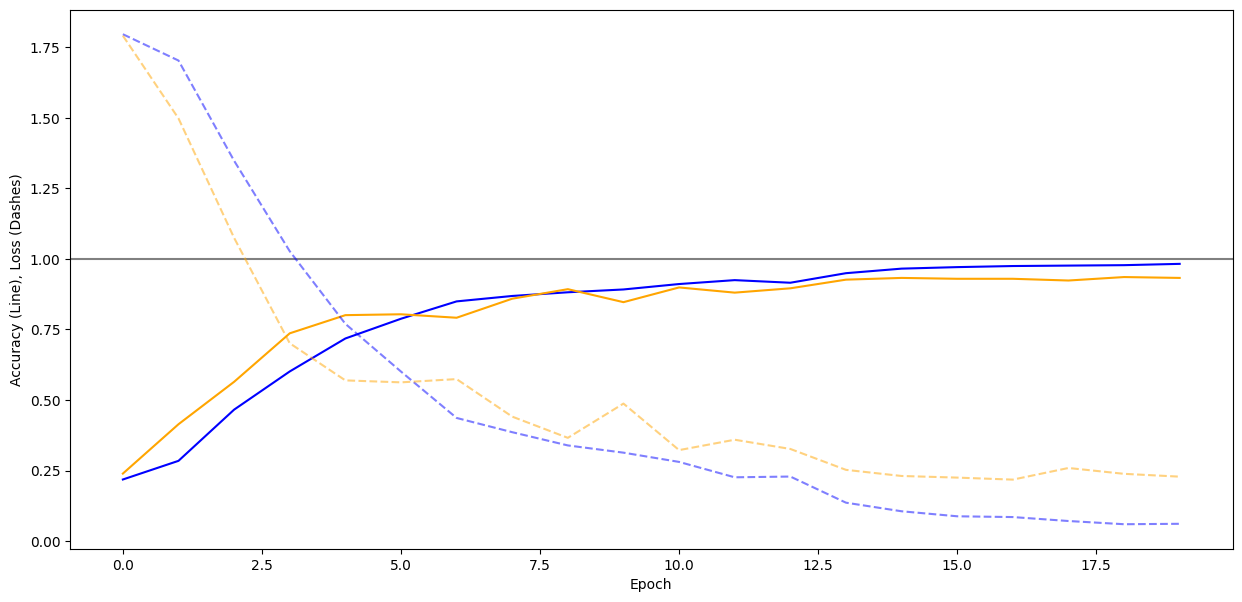

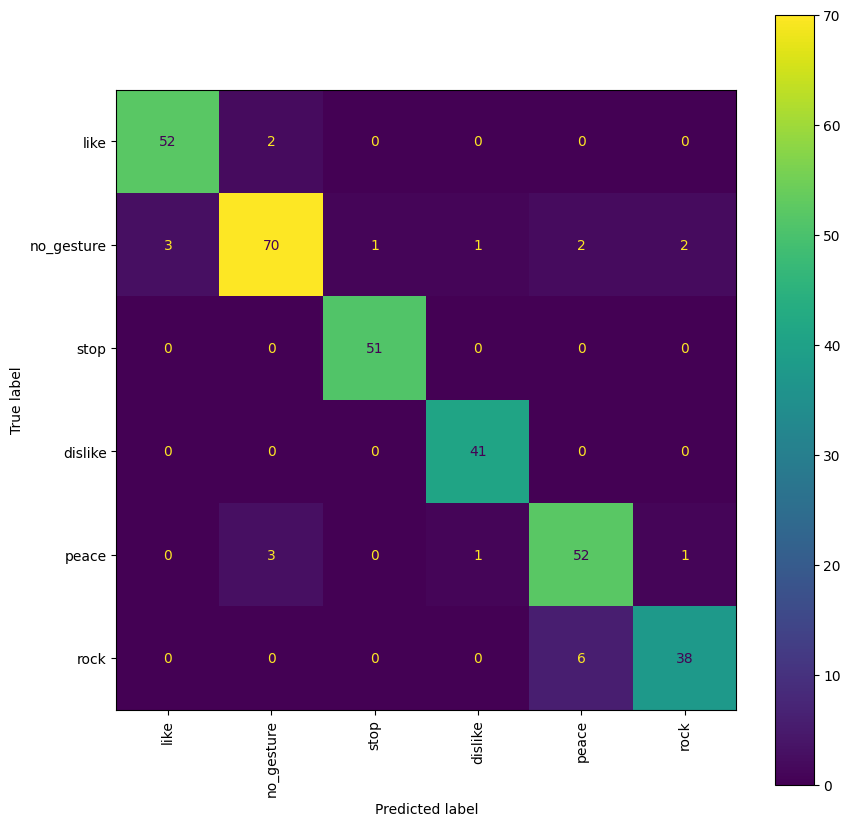

In [2]:

# variables for hyperparameters
batch_size = 8
epochs = 50
num_classes = len(label_names)
activation = 'relu'
activation_conv = 'leaky_relu'  # LeakyReLU
activation_hyperParam = 'leaky_relu'
layer_count = 2
num_neurons = 64

# define model structure
# with keras, we can use a model's add() function to add layers to the network one by one
model_1 = Sequential()

# data augmentation (this can also be done beforehand - but don't augment the test dataset!)
model_1.add(RandomFlip('horizontal'))
model_1.add(RandomContrast(0.1))
#model.add(RandomBrightness(0.1))
#model.add(RandomRotation(0.2))

# first, we add some convolution layers followed by max pooling
model_1.add(Conv2D(64, kernel_size=(9, 9), activation=activation_conv, input_shape=(SIZE[0], SIZE[1], COLOR_CHANNELS), padding='same'))
model_1.add(MaxPooling2D(pool_size=(4, 4), padding='same'))

model_1.add(Conv2D(32, (5, 5), activation=activation_conv, padding='same'))
model_1.add(MaxPooling2D(pool_size=(3, 3), padding='same'))

model_1.add(Conv2D(32, (3, 3), activation=activation_conv, padding='same'))
model_1.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# dropout layers can drop part of the data during each epoch - this prevents overfitting
model_1.add(Dropout(0.2))

# after the convolution layers, we have to flatten the data so it can be fed into fully connected layers
model_1.add(Flatten())

# add some fully connected layers ("Dense")
for i in range(layer_count - 1):
    model_1.add(Dense(num_neurons, activation=activation_hyperParam))

model_1.add(Dense(num_neurons, activation=activation_hyperParam))

# for classification, the last layer has to use the softmax activation function, which gives us probabilities for each category
model_1.add(Dense(num_classes, activation='softmax'))

# specify loss function, optimizer and evaluation metrics
# for classification, categorial crossentropy is used as a loss function
# use the adam optimizer unless you have a good reason not to
model_1.compile(loss=categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

# define callback functions that react to the model's behavior during training
# in this example, we reduce the learning rate once we get stuck and early stopping
# to cancel the training if there are no improvements for a certain amount of epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)
stop_early = EarlyStopping(monitor='val_loss', patience=3)


#training the model
history_1 = model_1.fit(
    X_train,
    train_label,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, test_label),
    callbacks=[reduce_lr, stop_early]
)


model_1.save('5_value_model.h5')

# let's have a look at our model
model_1.summary()



#Plotting the Progress
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy']
fig = plt.figure(figsize=(15, 7))
ax = plt.gca()

ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy (Line), Loss (Dashes)')

ax.axhline(1, color='gray')

plt.plot(accuracy, color='blue')
plt.plot(val_accuracy, color='orange')
plt.plot(loss, '--', color='blue', alpha=0.5)
plt.plot(val_loss, '--', color='orange', alpha=0.5)



#matrix
# let the model make predictions for our training data
y_predictions_1 = model_1.predict(X_test)

# we get a 2D numpy array with probabilities for each category
print('before', y_predictions_1)

# to build a confusion matrix, we have to convert it to classifications
# this can be done by using the argmax() function to set the probability to 1 and the rest to 0
y_predictions_1 = np.argmax(y_predictions_1, axis=1)

print('probabilities', y_predictions_1)

# create and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_predictions_1)

fig = plt.figure(figsize=(10, 10))

ConfusionMatrixDisplay(conf_matrix, display_labels=label_names).plot(ax=plt.gca())

plt.xticks(rotation=90, ha='center')


pass

# Evaluation

In [3]:
import cv2
import json
from matplotlib import pyplot as plt
import numpy as np
import os
import random

# import a lot of things from keras:
# sequential model
from keras.models import Sequential

# layers
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, RandomFlip, RandomRotation, RandomContrast, RandomBrightness

# loss function
from keras.metrics import categorical_crossentropy

# callback functions
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# convert data to categorial vector representation
from keras.utils import to_categorical

# nice progress bar for loading data
from tqdm.notebook import tqdm

# helper function for train/test split
from sklearn.model_selection import train_test_split

# import confusion matrix helper function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# import pre-trained model
from keras.applications.vgg16 import VGG16

from keras.models import load_model



0
reached
[0, 1, 2, 3, 4, 2, 1, 3, 1, 4, 0, 3, 2, 0, 4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
y_predictions 
[[6.14720818e-12 8.34506191e-03 3.00979970e-08 9.91654515e-01
  7.13805832e-08 2.87319409e-07]
 [5.91407843e-05 2.42547731e-06 9.99821842e-01 8.89011499e-05
  2.67207488e-05 1.01910689e-06]
 [9.99998093e-01 1.89701666e-06 2.12541784e-09 1.24880795e-14
  3.23920335e-11 2.06918114e-13]
 [9.99753296e-01 2.28138451e-04 1.97862681e-11 5.99278830e-12
  1.85762638e-05 1.99167012e-08]
 [4.58675712e-01 1.01895845e-02 4.93257493e-01 1.88507303e-03
  3.50268185e-02 9.65431682e-04]
 [9.49137986e-01 3.52239446e-03 2.21790560e-02 6.93759357e-05
  2.50594560e-02 3.17528320e-05]
 [6.89391090e-05 2.61386248e-07 9.99930382e-01 4.22379323e-08
  2.99489955e-07 1.47909542e-08]
 [4.19123173e-02 2.40059078e-01 3.31762105e-01 2.84708291e-01
  9.99674946e-02 1.59074797e-03]
 [1.17744552e-04 3.46045226e-07 9.99880910e-01 2.18616591e-08
  8.79939535e-07 6.41926334e-08]
 [1.41241914e-03 2.42091529e-02 7.2

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'dislike'),
  Text(1, 0, 'stop'),
  Text(2, 0, 'like'),
  Text(3, 0, 'rock'),
  Text(4, 0, 'peace')])

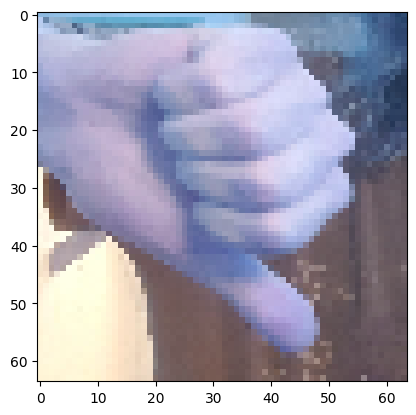

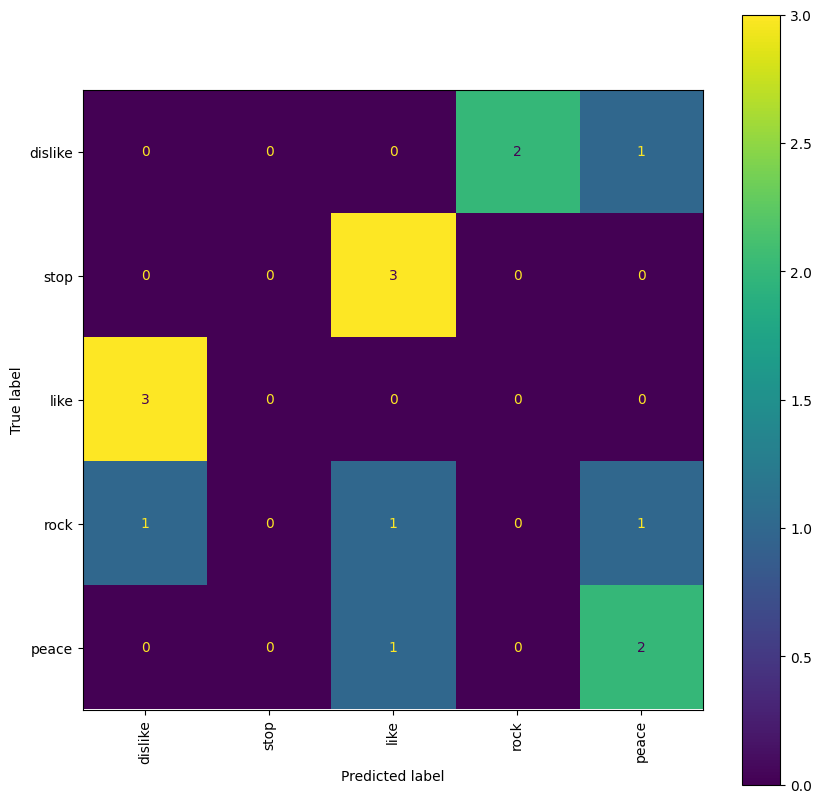

In [4]:



#model = tf.keras.models.load_model('5_value_model.keras')
#model = load_model("5_value_model.h5")
model = model_1 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
COLOR_CHANNELS = 3

IMG_SIZE = 64
SIZE = (IMG_SIZE, IMG_SIZE)

images = [] # stores actual image data
labels = [] 
label_names = []

def preprocess_image(img):
    if COLOR_CHANNELS == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img, SIZE)
    return img_resized

annotations = dict()
with open(f'annot-stefan.json') as f:
        annotations = json.load(f)

# Assuming you have a function `load_and_preprocess_images` that returns images and labels
X_test, y_test = [],[]
images = "images"

for filename in os.listdir(images):
    # extract unique ID from file name
    UID = filename.split('.')[0]
    img = cv2.imread(f'{images}/{filename}')
    
   
    
    
    # get annotation from the dict we loaded earlier
    try:
        annotation = annotations[UID]
    except Exception as e:
        print("fail")
        print(e)        
        continue
    
    # iterate over all hands annotated in the image
    for i, bbox in enumerate(annotation['bboxes']):
        # annotated bounding boxes are in the range from 0 to 1
        # therefore we have to scale them to the image size
        x1 = int(bbox[0] * img.shape[1])
        y1 = int(bbox[1] * img.shape[0])
        w = int(bbox[2] * img.shape[1])
        h = int(bbox[3] * img.shape[0])
        x2 = x1 + w
        y2 = y1 + h
        
        # crop image to the bounding box and apply pre-processing
        crop = img[y1:y2, x1:x2]
        preprocessed = preprocess_image(crop)
        
        # get the annotated hand's label
        # if we have not seen this label yet, add it to the list of labels
        label = annotation['labels'][i]
        if label not in label_names:
            label_names.append(label)
        
        label_index = label_names.index(label)
        #print("---")
        #print(label)
        #print(label_index)  
        #print(label_names)      
        
        X_test.append(preprocessed)
        y_test.append(label_index)
        #images.append(preprocessed)
        #labels.append(label_index)


#plt.imshow(random.sample(X_test, 1)[0])
plt.imshow(X_test[0])
print(y_test[0])
print("reached")


X_test = np.array(X_test).astype('float32')
X_test = X_test / 255.

y_test_one_hot = to_categorical(y_test)
test_label = y_test_one_hot
#X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, COLOR_CHANNELS)

print(y_test)


#matrix
# let the model make predictions for our training data
y_predictions = model.predict(X_test)
print("y_predictions ")
print(y_predictions )
# to build a confusion matrix, we have to convert it to classifications
# this can be done by using the argmax() function to set the probability to 1 and the rest to 0
y_predictions = np.argmax(y_predictions, axis=1)


# create and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_predictions)


fig = plt.figure(figsize=(10, 10))
ConfusionMatrixDisplay(conf_matrix, display_labels=label_names).plot(ax=plt.gca())
plt.xticks(rotation=90, ha='center')
